This code is adopted from Lab 7 and modified to work for rank predication.

# Imports & Downloading Dataset

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Get file id from the link
#https://drive.google.com/file/d/1Aseiwo5Ix9DzId1r4ibJ_qZeegULz2wb/view?usp=sharing
id = "1Aseiwo5Ix9DzId1r4ibJ_qZeegULz2wb"

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('IPBroadcaster_Input_2018-05-27_0.log')

## Task 2:

__First 10 columns of completed laps from `INDYCAR Timing Data Document v2018.1.pdf` provided below:__

__Time columns are in ten thousand seconds. Identify them__

In [2]:
column_names= ['command', 'type_of_record', 'sequence_number', 'preamble', 'rank', 
         'car_number', 'unique_id', 'completed_laps', 'elapsed_time',
         'last_laptime', 'lap_status', 'best_laptime', 'best_lap',
         'time_behind_leader', 'laps_behind_leader', 'time_behind_prec', 
         'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
         'current_status', 'track_status', 'pit_stop_count', 
         'last_pitted_lap', 'start_position', 'laps_led']


hex_columns= ['sequence_number','rank', 'unique_id', 'completed_laps',
           'elapsed_time', 'last_laptime', 'best_laptime', 'best_lap',
           'time_behind_leader', 'laps_behind_leader', 'time_behind_prec',
           'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
           'pit_stop_count', 'last_pitted_lap', 'start_position', 'laps_led']

time_columns= ['elapsed_time', 'last_laptime', 'best_laptime', 
               'time_behind_leader', 'time_behind_prec', 'overall_best_laptime']

# Get Completed Laps Data and Write to a CSV File

In [3]:
# converts hexadecimal columns to decimal
def hex2dec(record, cols):
  for col in cols:
    record[col] = int(record[col], 16)


# Time columns are in ten thousand sec. Converts to sec
def tenThousandsToSec(record, cols):
  for col in cols:
    record[col] = record[col] / 10000.0

In [4]:
log_file = "IPBroadcaster_Input_2018-05-27_0.log"


csv_file_name = 'completed_laps.csv'
csv_file = open(csv_file_name, 'w')

writer = csv.DictWriter(csv_file, fieldnames=column_names)

writer.writeheader()

i = 0
with open(log_file,'r', encoding="cp1252") as f:
  for line in f:
    if line.startswith("$C"):
      #print(line)
      # each line has \n at the end: remove and split
      raw_record = line.replace('\n', '').split('¦')
      
      record = {}
      
      for idx, val in enumerate(raw_record):
        record[column_names[idx]] = val

      hex2dec(record, hex_columns)
      tenThousandsToSec(record, time_columns)

      writer.writerow(record)
      i = i + 1
      if i % 100 == 0:
        print(i, 'records were extracted from the log file')

csv_file.close()
print('CSV file was created')

100 records were extracted from the log file
200 records were extracted from the log file
300 records were extracted from the log file
400 records were extracted from the log file
500 records were extracted from the log file
600 records were extracted from the log file
700 records were extracted from the log file
800 records were extracted from the log file
900 records were extracted from the log file
1000 records were extracted from the log file
1100 records were extracted from the log file
1200 records were extracted from the log file
1300 records were extracted from the log file
1400 records were extracted from the log file
1500 records were extracted from the log file
1600 records were extracted from the log file
1700 records were extracted from the log file
1800 records were extracted from the log file
1900 records were extracted from the log file
2000 records were extracted from the log file
2100 records were extracted from the log file
2200 records were extracted from the log fi

# Read The CSV File

In [5]:
dataset = pd.read_csv(csv_file_name)

dataset.head(10)

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,$C,U,0,S10,1,9.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
1,$C,R,0,S10,1,9.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
2,$C,U,0,S10,1,9.0,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
3,$C,R,0,S10,1,9.0,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
4,$C,U,1,S10,1,9.0,0,1,405.1676,202.9926,T,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,0,0,1,0
5,$C,U,2,S10,1,9.0,0,2,612.4927,207.3251,P,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,1,2,1,0
6,$C,U,0,R.I,1,20.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,U,0,0,1,0
7,$C,U,65536,R.I,2,22.0,1,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,2,0.0000,Active,U,0,0,2,0
8,$C,U,131072,R.I,3,12.0,2,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,3,0.0000,Active,U,0,0,3,0
9,$C,U,196608,R.I,4,1.0,3,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,4,0.0000,Active,U,0,0,4,0


In [6]:
dataset.shape[0]

19427

In [7]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   command               19427 non-null  object 
 1   type_of_record        19427 non-null  object 
 2   sequence_number       19427 non-null  int64  
 3   preamble              19427 non-null  object 
 4   rank                  19427 non-null  int64  
 5   car_number            19426 non-null  float64
 6   unique_id             19427 non-null  int64  
 7   completed_laps        19427 non-null  int64  
 8   elapsed_time          19427 non-null  float64
 9   last_laptime          19427 non-null  float64
 10  lap_status            19427 non-null  object 
 11  best_laptime          19427 non-null  float64
 12  best_lap              19427 non-null  int64  
 13  time_behind_leader    19427 non-null  float64
 14  laps_behind_leader    19427 non-null  int64  
 15  time_behind_prec   

In [8]:
dataset.car_number.unique()

array([ 9., 20., 22., 12.,  1., 18., 21., 13.,  3., 14.,  4., 98., 19.,
       28., 23., 30., 32.,  6., 33., 59., 29., 88., 25., 24., 26., 64.,
       66.,  7., 10., 15., 60., 27., 17., nan])

## Lets drop nan and convert car number to integer

In [9]:
dataset = dataset.dropna()
dataset.car_number = dataset.car_number.astype('int')
dataset.head(10)

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,$C,U,0,S10,1,9,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
1,$C,R,0,S10,1,9,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
2,$C,U,0,S10,1,9,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
3,$C,R,0,S10,1,9,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
4,$C,U,1,S10,1,9,0,1,405.1676,202.9926,T,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,0,0,1,0
5,$C,U,2,S10,1,9,0,2,612.4927,207.3251,P,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,1,2,1,0
6,$C,U,0,R.I,1,20,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,U,0,0,1,0
7,$C,U,65536,R.I,2,22,1,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,2,0.0000,Active,U,0,0,2,0
8,$C,U,131072,R.I,3,12,2,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,3,0.0000,Active,U,0,0,3,0
9,$C,U,196608,R.I,4,1,3,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,4,0.0000,Active,U,0,0,4,0


In [10]:
dataset.car_number.unique()

array([ 9, 20, 22, 12,  1, 18, 21, 13,  3, 14,  4, 98, 19, 28, 23, 30, 32,
        6, 33, 59, 29, 88, 25, 24, 26, 64, 66,  7, 10, 15, 60, 27, 17])

## Lets find the cars that completed the race.

In [11]:
dataset.completed_laps.max()

200

In [12]:
completed_cars = dataset[dataset.completed_laps == 200].car_number.unique()
completed_cars

array([12, 20,  9, 27, 28, 22, 29,  1,  6, 15, 66, 98,  4, 88, 25, 60, 64,
       23])

## We can drop the rest

In [13]:
dataset = dataset[dataset['car_number'].isin(completed_cars)]

## There are multiple records per lap as can be seen below:

In [14]:
dataset[dataset.car_number == 12][40:60]

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
1485,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,1.7357,0,1.0507,0,3,40.7903,Active,G,0,0,3,0
1538,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,0.0000,1,1.0507,0,3,40.7903,Active,G,0,0,3,0
1570,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1571,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,1.9854,0,1.2765,0,3,40.7903,Active,G,0,0,3,0
1623,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,0.0000,1,1.2765,0,3,40.7903,Active,G,0,0,3,0
1655,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1656,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,1.9029,0,1.3406,0,3,40.7903,Active,G,0,0,3,0
1709,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,0.0000,1,1.3406,0,3,40.7903,Active,G,0,0,3,0
1741,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1742,$C,U,131082,R.I,3,12,2,10,412.1349,41.0486,T,40.7903,5,1.9826,0,1.1285,0,3,40.7903,Active,G,0,0,3,0


## Lets get the first occurence for each lap

In [15]:
dataset = dataset.groupby(by=['car_number', 'completed_laps']).first()
dataset = dataset.reset_index()
dataset[dataset.car_number == 12][40:60]

,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
844,12,40,$C,U,131112,R.I,6,2,1699.4016,41.2059,T,40.359,36,7.2040,0,1.6096,0,6,40.359,Active,G,1,32,3,0
845,12,41,$C,U,131113,R.I,6,2,1740.7074,41.3058,T,40.359,36,7.0913,0,1.6986,0,6,40.359,Active,G,1,32,3,0
846,12,42,$C,U,131114,R.I,6,2,1781.7461,41.0387,T,40.359,36,6.6260,0,1.4828,0,6,40.359,Active,G,1,32,3,0
847,12,43,$C,U,131115,R.I,6,2,1822.8701,41.1240,T,40.359,36,6.5806,0,1.3615,0,6,40.359,Active,G,1,32,3,0
848,12,44,$C,U,131116,R.I,6,2,1864.3564,41.4863,T,40.359,36,6.7055,0,1.3802,0,6,40.359,Active,G,1,32,3,0
849,12,45,$C,U,131117,R.I,6,2,1905.6903,41.3339,T,40.359,36,6.5612,0,1.4230,0,6,40.359,Active,G,1,32,3,0
850,12,46,$C,U,131118,R.I,6,2,1947.0640,41.3737,T,40.359,36,6.4523,0,1.6558,0,6,40.359,Active,G,1,32,3,0
851,12,47,$C,U,131119,R.I,6,2,1988.8121,41.7481,T,40.359,36,6.6138,0,1.6612,0,6,40.359,Active,G,1,32,3,0
852,12,48,$C,U,131120,R.I,6,2,2051.6608,62.8487,T,40.359,36,11.4087,0,3.1297,0,6,40.359,Active,Y,1,32,3,0
853,12,49,$C,U,131121,R.I,6,2,2148.8093,97.1485,T,40.359,36,6.5879,0,2.0162,0,6,40.359,Active,Y,1,32,3,0


EDA

In [16]:
import seaborn as sns


In [17]:
copy = dataset.copy()

In [18]:
copy.car_number.unique()

array([ 1,  4,  6,  9, 12, 15, 20, 22, 23, 25, 27, 28, 29, 60, 64, 66, 88,
       98])

In [19]:
copy.columns

Index(['car_number', 'completed_laps', 'command', 'type_of_record',
       'sequence_number', 'preamble', 'rank', 'unique_id', 'elapsed_time',
       'last_laptime', 'lap_status', 'best_laptime', 'best_lap',
       'time_behind_leader', 'laps_behind_leader', 'time_behind_prec',
       'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
       'current_status', 'track_status', 'pit_stop_count', 'last_pitted_lap',
       'start_position', 'laps_led'],
      dtype='object')

In [20]:
temp = copy[copy.completed_laps == 200]

list_carorder =temp.car_number.to_list()

print(list_carorder)

[1, 4, 6, 9, 12, 15, 20, 22, 23, 25, 27, 28, 29, 60, 64, 66, 88, 98]


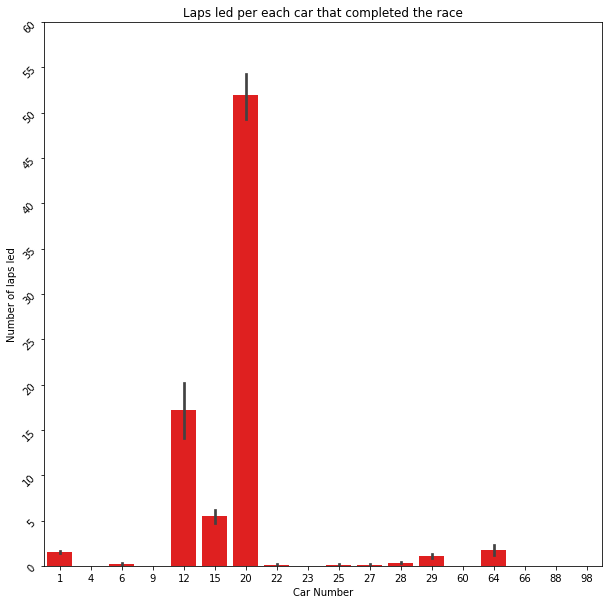

In [21]:
#The number of laps led by each car that completed the race
plt.figure(figsize=(10,10))
sns.barplot(x = copy.car_number, y = copy.laps_led, color ='red') 
plt.xlabel("Car Number") 
plt.ylabel("Number of laps led") 
plt.title("Laps led per each car that completed the race") 
#plt.xticks(list_carorder, list_carorder,rotation=45) 
plt.yticks(np.arange(min(copy.laps_led), max(copy.laps_led), step=5), rotation = 45)
plt.show() 

In [22]:
df_sorted= temp.sort_values('overall_rank')
df_sorted

,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
1004,12,200,$C,U,131272,R.I,1,2,10782.6365,41.3651,T,40.3035,199,0.0000,0,0.0000,0,1,40.3035,Active,K,5,171,3,59
1406,20,200,$C,U,200,R.I,2,0,10785.7954,41.7902,T,40.2368,33,3.1589,0,3.1589,0,2,40.2368,Active,K,5,173,1,65
803,9,200,$C,U,524488,R.I,3,8,10787.2293,41.5713,T,40.6543,133,4.5928,0,1.4339,0,3,40.6543,Active,K,5,160,9,0
2210,27,200,$C,U,2031816,R.I,4,31,10787.8602,41.5437,T,40.3275,179,5.2237,0,0.6309,0,4,40.3275,Active,K,5,174,32,1
2411,28,200,$C,U,852168,R.I,5,13,10789.3552,42.0466,T,40.4560,180,6.7187,0,1.4950,0,5,40.4560,Active,K,5,172,14,1
1607,22,200,$C,U,65736,R.I,6,1,10789.8722,42.2442,T,40.4933,181,7.2357,0,0.5170,0,6,40.4933,Active,K,5,175,2,1
2612,29,200,$C,U,1310920,R.I,7,20,10790.4742,42.2352,T,40.1956,178,7.8377,0,0.6020,0,7,40.1956,Active,K,6,176,21,4
200,1,200,$C,U,196808,R.I,8,3,10791.3282,41.7541,T,40.5625,174,8.6917,0,0.8540,0,8,40.5625,Active,K,6,170,4,3
602,6,200,$C,U,1114312,R.I,9,17,10791.9477,41.4786,T,40.5861,198,9.3112,0,0.6195,0,9,40.5861,Active,K,7,191,18,2
1205,15,200,$C,U,1900744,R.I,10,29,10793.9733,42.1684,T,40.4614,42,11.3368,0,2.0256,0,10,40.4614,Active,K,6,173,30,12


In [23]:

list_carorder2 =df_sorted.car_number.to_list()

print(list_carorder2)

[12, 20, 9, 27, 28, 22, 29, 1, 6, 15, 66, 98, 4, 88, 25, 60, 64, 23]


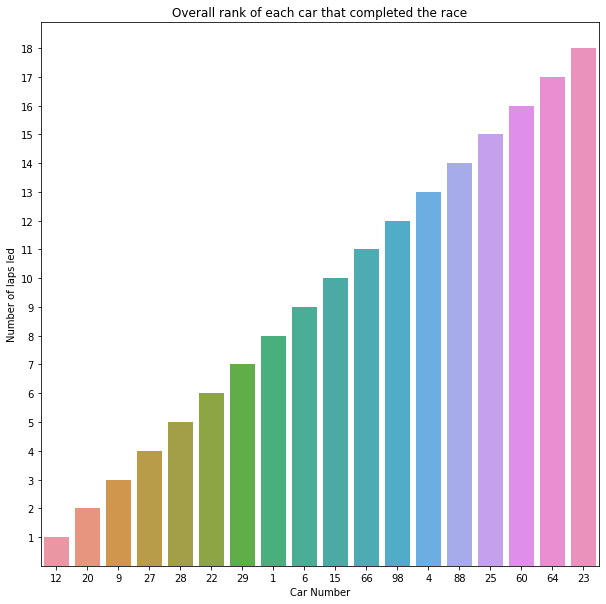

In [24]:
#The overall rank of each car that completed the race - what does this mean? + what year data is this?

plt.figure(figsize=(10,10))
sns.barplot(x='car_number',
            y="overall_rank", 
            data=df_sorted, 
            order=df_sorted.sort_values('overall_rank').car_number)
# set labels
#plt.bar(df_sorted.car_number, df_sorted.overall_rank, color ='black') 
plt.xlabel("Car Number") 
plt.ylabel("Number of laps led") 
plt.title("Overall rank of each car that completed the race") 
#plt.xticks(list_carorder2, map(str, list_carorder2)) 
#plt.yticks(0, max(temp.overall_rank)+1,rotation=45)
plt.yticks(np.arange(min(df_sorted.overall_rank), max(df_sorted.overall_rank)+1))
plt.show() 

In [25]:
# #Number of pitstops of each car that completed the race
# plt.figure(figsize=(30,10))
# plt.bar(copy.car_number, copy.pit_stop_count, color ='blue', width = 0.4) 
# plt.xlabel("Car Number") 
# plt.ylabel("Number of pitstops") 
# plt.title("Number of pitstops of each car that completed the race") 
# plt.xticks(np.arange(min(copy.car_number), max(copy.car_number)+5),rotation=45)
# #plt.xticks(np.arange(len(copy.car_number)), copy.car_number,rotation=20) 
# plt.show() 

In [26]:
#copy[['car_number','pit_stop_count']]
copy[copy.car_number == 12]

,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
804,12,0,$C,U,131072,R.I,3,2,0.0000,0.0000,T,0.0000,0,0.0000,0,0.0000,0,3,0.0000,Active,U,0,0,3,0
805,12,1,$C,U,131073,R.I,2,2,42.1485,41.9238,T,41.9238,1,0.2113,0,0.2113,0,2,41.9238,Active,G,0,0,3,0
806,12,2,$C,U,131074,R.I,2,2,83.1845,41.0360,T,41.0360,2,0.4727,0,0.4727,0,2,41.0360,Active,G,0,0,3,0
807,12,3,$C,U,131075,R.I,3,2,124.5184,41.3339,T,41.0360,2,0.9999,0,0.5951,0,3,41.0360,Active,G,0,0,3,0
808,12,4,$C,U,131076,R.I,3,2,165.6102,41.0918,T,41.0360,2,1.2514,0,0.8079,0,3,41.0360,Active,G,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,12,196,$C,U,131268,R.I,1,2,10619.6075,41.6069,T,40.3590,36,0.0000,0,0.0000,0,1,40.3590,Active,G,5,171,3,55
1001,12,197,$C,U,131269,R.I,1,2,10660.4033,40.7958,T,40.3590,36,0.0000,0,0.0000,0,1,40.3590,Active,G,5,171,3,56
1002,12,198,$C,U,131270,R.I,1,2,10700.9679,40.5646,T,40.3590,36,0.0000,0,0.0000,0,1,40.3590,Active,G,5,171,3,57
1003,12,199,$C,U,131271,R.I,1,2,10741.2714,40.3035,T,40.3035,199,0.0000,0,0.0000,0,1,40.3035,Active,G,5,171,3,58


In [27]:
max_pitstop = copy.groupby(['car_number'], as_index=False)['pit_stop_count'].max()
max_pitstop

,car_number,pit_stop_count
0,1,6
1,4,5
2,6,7
3,9,5
4,12,5
5,15,6
6,20,5
7,22,5
8,23,8
9,25,7


In [28]:
total_num_pitstops = max_pitstop.pit_stop_count.sum()
total_num_pitstops

106

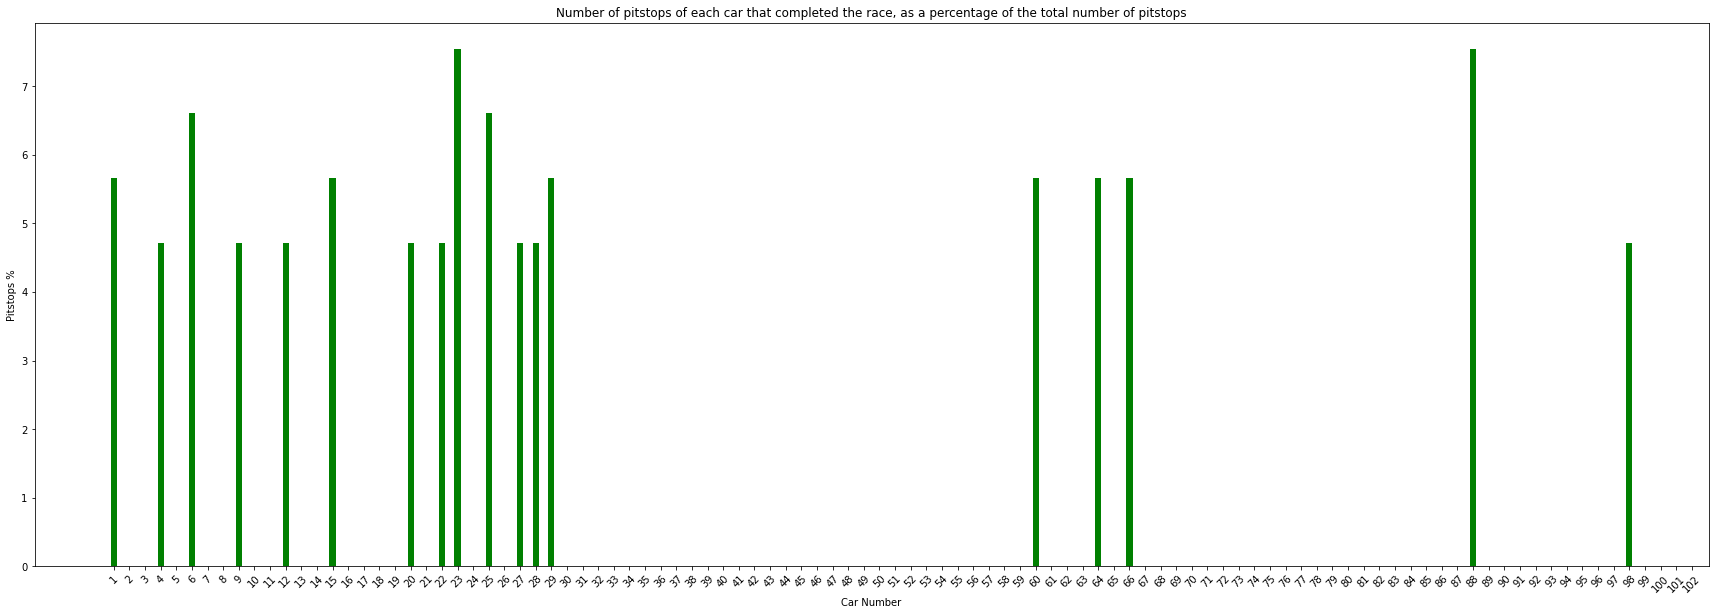

In [29]:
#Number of pitstops of each car that completed the race, as a percentage of the total pitstops  - tells us how the cars performed relatively
plt.figure(figsize=(30,10))
plt.bar(copy.car_number, (copy.pit_stop_count/total_num_pitstops)*100, color ='green', width = 0.4) 
plt.xlabel("Car Number") 
plt.ylabel("Pitstops %") 
plt.title("Number of pitstops of each car that completed the race, as a percentage of the total number of pitstops") 
plt.xticks(np.arange(min(copy.car_number), max(copy.car_number)+5),rotation=45)
#plt.xticks(np.arange(len(copy.car_number)), copy.car_number,rotation=20) 
plt.show() 

In [30]:
rank_list = df_sorted.overall_rank.to_list()
rank_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

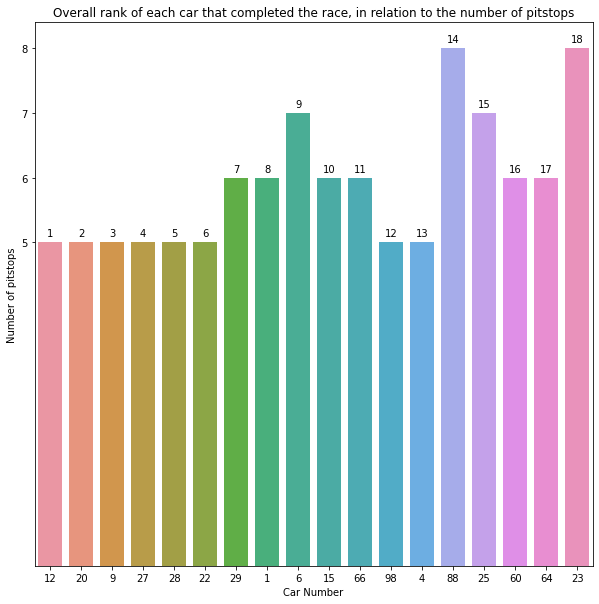

In [31]:
#The overall rank of each car that completed the race - vs the pitstops taken by that car

plt.figure(figsize=(10,10))
splot = sns.barplot(x='car_number',
            y="pit_stop_count", 
            data=df_sorted, 
            order=df_sorted.sort_values('overall_rank').car_number)
for i, p in zip(range(len(rank_list)),splot.patches):
    #print(rank_list[i])
    splot.annotate(rank_list[i], (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# set labels
#plt.bar(df_sorted.car_number, df_sorted.overall_rank, color ='black') 
plt.xlabel("Car Number") 
plt.ylabel("Number of pitstops") 
plt.title("Overall rank of each car that completed the race, in relation to the number of pitstops") 
#plt.xticks(list_carorder2, map(str, list_carorder2)) 
#plt.yticks(0, max(temp.overall_rank)+1,rotation=45)
plt.yticks(np.arange(min(df_sorted.pit_stop_count), max(df_sorted.pit_stop_count)+1))
plt.show() 

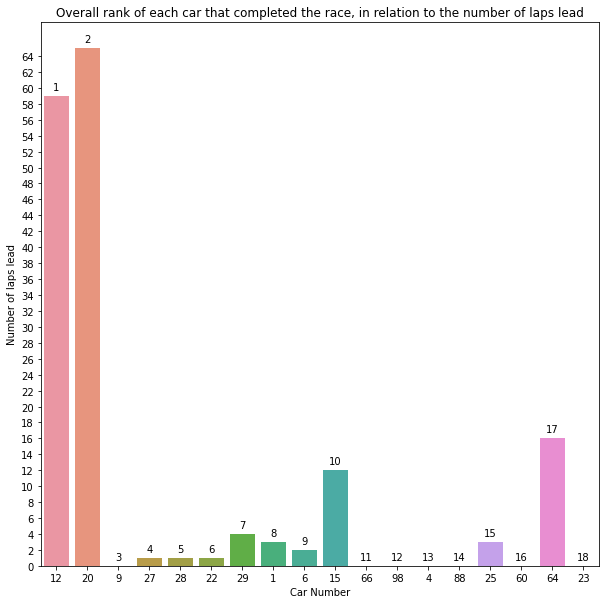

In [32]:
#The overall rank of each car that completed the race - vs the lap lead taken by that car

plt.figure(figsize=(10,10))
splot = sns.barplot(x='car_number',
            y="laps_led", 
            data=df_sorted, 
            order=df_sorted.sort_values('overall_rank').car_number)
for i, p in zip(range(len(rank_list)),splot.patches):
    #print(rank_list[i])
    splot.annotate(rank_list[i], (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# set labels
#plt.bar(df_sorted.car_number, df_sorted.overall_rank, color ='black') 
plt.xlabel("Car Number") 
plt.ylabel("Number of laps lead") 
plt.title("Overall rank of each car that completed the race, in relation to the number of laps lead") 
#plt.xticks(list_carorder2, map(str, list_carorder2)) 
#plt.yticks(0, max(temp.overall_rank)+1,rotation=45)
plt.yticks(np.arange(min(df_sorted.laps_led), max(df_sorted.laps_led)+1, step=2))
plt.show() 

In [33]:
df_sorted

,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
1004,12,200,$C,U,131272,R.I,1,2,10782.6365,41.3651,T,40.3035,199,0.0000,0,0.0000,0,1,40.3035,Active,K,5,171,3,59
1406,20,200,$C,U,200,R.I,2,0,10785.7954,41.7902,T,40.2368,33,3.1589,0,3.1589,0,2,40.2368,Active,K,5,173,1,65
803,9,200,$C,U,524488,R.I,3,8,10787.2293,41.5713,T,40.6543,133,4.5928,0,1.4339,0,3,40.6543,Active,K,5,160,9,0
2210,27,200,$C,U,2031816,R.I,4,31,10787.8602,41.5437,T,40.3275,179,5.2237,0,0.6309,0,4,40.3275,Active,K,5,174,32,1
2411,28,200,$C,U,852168,R.I,5,13,10789.3552,42.0466,T,40.4560,180,6.7187,0,1.4950,0,5,40.4560,Active,K,5,172,14,1
1607,22,200,$C,U,65736,R.I,6,1,10789.8722,42.2442,T,40.4933,181,7.2357,0,0.5170,0,6,40.4933,Active,K,5,175,2,1
2612,29,200,$C,U,1310920,R.I,7,20,10790.4742,42.2352,T,40.1956,178,7.8377,0,0.6020,0,7,40.1956,Active,K,6,176,21,4
200,1,200,$C,U,196808,R.I,8,3,10791.3282,41.7541,T,40.5625,174,8.6917,0,0.8540,0,8,40.5625,Active,K,6,170,4,3
602,6,200,$C,U,1114312,R.I,9,17,10791.9477,41.4786,T,40.5861,198,9.3112,0,0.6195,0,9,40.5861,Active,K,7,191,18,2
1205,15,200,$C,U,1900744,R.I,10,29,10793.9733,42.1684,T,40.4614,42,11.3368,0,2.0256,0,10,40.4614,Active,K,6,173,30,12


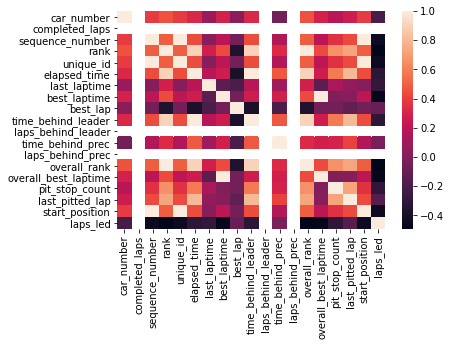

In [34]:
corr = df_sorted.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

## Lets change track status to binary for the simplicity. Green, Unflagged and K as 0, Y as 1

In [35]:
dataset.track_status.unique()

array(['U', 'G', 'Y', 'K'], dtype=object)

In [36]:
dataset.track_status[dataset.track_status.isin(['G', 'U', 'K'])] = 0
dataset.track_status[dataset.track_status .isin(['Y'])] = 1
dataset.track_status = dataset.track_status.astype('int')
dataset.track_status.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

## Drop columns that we wont use

In [37]:
# drop_cols = ['command', 'type_of_record', 'sequence_number', 'preamble', 'rank',
#              'unique_id', 'lap_status', 'best_lap',
#              'laps_behind_leader',
#              'laps_behind_prec',
#              'current_status', 'last_pitted_lap', 'start_position', 'laps_led']

# dataset = dataset.drop(columns=drop_cols)
# dataset

In [38]:
def create_dataset(df, time_steps=1, future_step=1):
  # reshape to [samples, time_steps, n_features]
    Xs, ys = [], []

    cars = df['car_number'].unique()

    for car in cars:
      car_data = df[df.car_number == car]
      car_data = car_data[['overall_rank', 'last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec',]].values
      target_col_index = 0

      for i in range(len(car_data)-time_steps):
        v = np.array(car_data[i:i+time_steps])
        Xs.append(v)
        ys.append(car_data[i+future_step+time_steps-1, target_col_index])

    return np.array(Xs), np.expand_dims(ys,1)

In [39]:
# Lets use first 170 lap for the training
train_X, train_y = create_dataset(dataset[dataset.completed_laps < 170], time_steps=10, future_step=1)

In [40]:
train_X.shape

(2880, 10, 16)

In [41]:
train_y.shape

(2880, 1)

In [42]:
# d_uniq = dataset['car_number'].unique()
# cols = ['overall_rank', 'last_laptime', 'track_status',
#                            'pit_stop_count', 'completed_laps', 'elapsed_time',
#                            'best_laptime', 'time_behind_leader',
#                            'time_behind_prec', 'overall_best_laptime', 
#                            'last_pitted_lap', 'start_position', 'laps_led', 
#                            'best_lap', 'laps_behind_leader', 'laps_behind_prec']

In [43]:
train_X[1]

array([[  4.    ,  42.3679,   0.    ,   0.    ,   1.    ,  42.7829,
         42.3679,   0.8457,   0.5677,  42.3679,   0.    ,   4.    ,
          0.    ,   1.    ,   0.    ,   0.    ],
       [  4.    ,  41.0984,   0.    ,   0.    ,   2.    ,  83.8813,
         41.0984,   1.1695,   0.6452,  41.0984,   0.    ,   4.    ,
          0.    ,   2.    ,   0.    ,   0.    ],
       [  4.    ,  41.0943,   0.    ,   0.    ,   3.    , 124.9756,
         41.0943,   1.4571,   0.4572,  41.0943,   0.    ,   4.    ,
          0.    ,   3.    ,   0.    ,   0.    ],
       [  4.    ,  41.118 ,   0.    ,   0.    ,   4.    , 166.0936,
         41.0943,   1.7348,   0.4834,  41.0943,   0.    ,   4.    ,
          0.    ,   3.    ,   0.    ,   0.    ],
       [  4.    ,  41.0717,   0.    ,   0.    ,   5.    , 207.1653,
         41.0717,   1.9046,   0.7648,  41.0717,   0.    ,   4.    ,
          0.    ,   5.    ,   0.    ,   0.    ],
       [  4.    ,  41.187 ,   0.    ,   0.    ,   6.    , 248.3523,
       

In [44]:
train_y[0]

array([4.])

In [48]:
dataset.to_csv('cleaned_completed_laps.csv')

In [49]:
dataset.shape

(3618, 25)

In [50]:
dataset.columns

Index(['car_number', 'completed_laps', 'command', 'type_of_record',
       'sequence_number', 'preamble', 'rank', 'unique_id', 'elapsed_time',
       'last_laptime', 'lap_status', 'best_laptime', 'best_lap',
       'time_behind_leader', 'laps_behind_leader', 'time_behind_prec',
       'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
       'current_status', 'track_status', 'pit_stop_count', 'last_pitted_lap',
       'start_position', 'laps_led'],
      dtype='object')

Trying with Machine Learning Models


In [51]:
#load csv
data_ml = pd.read_csv("cleaned_completed_laps.csv")

In [52]:
data_ml.shape

(3618, 26)

In [53]:
data_ml

,Unnamed: 0,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,0,1,0,$C,U,196608,R.I,4,3,0.0000,0.0000,T,0.0000,0,0.0000,0,0.0000,0,4,0.0000,Active,0,0,0,4,0
1,1,1,1,$C,U,196609,R.I,4,3,42.7829,42.3679,T,42.3679,1,0.8457,0,0.5677,0,4,42.3679,Active,0,0,0,4,0
2,2,1,2,$C,U,196610,R.I,4,3,83.8813,41.0984,T,41.0984,2,1.1695,0,0.6452,0,4,41.0984,Active,0,0,0,4,0
3,3,1,3,$C,U,196611,R.I,4,3,124.9756,41.0943,T,41.0943,3,1.4571,0,0.4572,0,4,41.0943,Active,0,0,0,4,0
4,4,1,4,$C,U,196612,R.I,4,3,166.0936,41.1180,T,41.0943,3,1.7348,0,0.4834,0,4,41.0943,Active,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,3613,98,196,$C,U,721092,R.I,14,11,10628.3775,42.5039,T,40.7202,94,8.7700,0,0.6492,0,14,40.7202,Active,0,5,170,12,0
3614,3614,98,197,$C,U,721093,R.I,12,11,10670.5952,42.2177,T,40.7202,94,10.1919,0,0.7251,0,12,40.7202,Active,0,5,170,12,0
3615,3615,98,198,$C,U,721094,R.I,12,11,10712.8689,42.2737,T,40.7202,94,11.9010,0,0.9004,0,12,40.7202,Active,0,5,170,12,0
3616,3616,98,199,$C,U,721095,R.I,12,11,10754.8359,41.9670,T,40.7202,94,13.5645,0,1.2233,0,12,40.7202,Active,0,5,170,12,0


In [54]:
data_ml_170 = data_ml

In [55]:
data_ml_12 = data_ml[data_ml.car_number == 12 ]

In [56]:
data_ml_subset = data_ml_170[['overall_rank','last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec']]

In [57]:
x_train = data_ml_subset[['last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec']]
y_train = data_ml_subset.overall_rank

In [58]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 11, max_depth = 10, max_leaf_nodes = 20, min_samples_leaf = 50)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [59]:
#for car 12
data_ml_subset_test = data_ml_12[['overall_rank', 'last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec']]
x_train_12 = data_ml_subset_test[['last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec']]
y_train_12 = data_ml_subset_test.overall_rank

In [60]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_train_12)
# Calculate the absolute errors
#print(predictions)
#print(y_train_12)
errors = abs(predictions - y_train_12)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 1.3171662783322455


In [61]:
val = y_train_12.values
type(predictions)

numpy.ndarray

([<matplotlib.axis.YTick at 0x7f350d92c588>,
 <a list of 11 Text major ticklabel objects>)

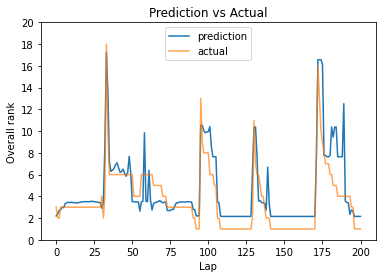

In [62]:
plt.plot(predictions)
plt.plot(val, alpha=0.7)
plt.legend(['prediction', 'actual'])
plt.title("Prediction vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(0, 22, 2)))

LightGBM

In [63]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.0001
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'
params['num_leaves'] = 50
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 500)

In [64]:
y_pred=clf.predict(x_train_12)
#print(predictions)
#print(y_train_12)
errors = abs(y_pred - y_train_12)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 8.627901422966069


In [65]:
y_pred

array([12.07457671, 12.14493913, 12.14493913, 12.14493913, 12.19004033,
       12.19004033, 12.20322312, 12.17307914, 12.17307914, 12.17307914,
       12.17307914, 12.17307914, 12.17307914, 12.17307914, 12.17307914,
       12.17307914, 12.17307914, 12.17307914, 12.17307914, 12.17592997,
       12.1592864 , 12.1592864 , 12.190114  , 12.190114  , 12.190114  ,
       12.1592864 , 12.17307914, 12.17307914, 12.20322312, 12.20322312,
       12.24143625, 12.17307914, 12.26945175, 12.90696845, 12.76877841,
       12.26945175, 12.37859478, 12.37859478, 12.37859478, 12.37859478,
       12.37859478, 12.37859478, 12.37859478, 12.37859478, 12.37859478,
       12.37859478, 12.37859478, 12.37859478, 12.26945175, 12.37859478,
       12.29830498, 12.29830498, 12.29830498, 12.29830498, 12.20322312,
       12.14493913, 12.29830498, 12.29830498, 12.37227236, 12.22025798,
       12.22025798, 12.37227236, 12.22025798, 12.14493913, 12.29830498,
       12.29830498, 12.29830498, 12.29830498, 12.22025798, 12.22

([<matplotlib.axis.YTick at 0x7f350d5a09b0>,
 <a list of 11 Text major ticklabel objects>)

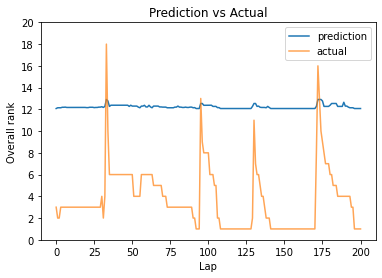

In [66]:
plt.plot(y_pred)
plt.plot(val, alpha=0.7)
plt.legend(['prediction', 'actual'])
plt.title("Prediction vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(0, 22, 2)))
#plt.yticks(list(range(max(0,int(min(y_train_12))-2), int(max(y_train_12))+3, 2)))

Adaboost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [69]:
predictions = classifier.predict(x_train_12)
errors = abs(predictions - y_train_12)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 4.656716417910448


([<matplotlib.axis.YTick at 0x7f350db82940>,
 <a list of 11 Text major ticklabel objects>)

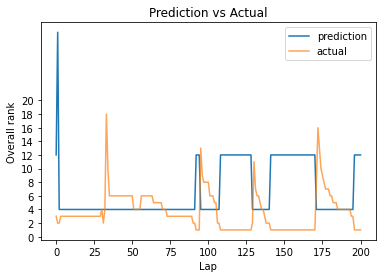

In [70]:
plt.plot(predictions)
plt.plot(val, alpha=0.7)
plt.legend(['prediction', 'actual'])
plt.title("Prediction vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(0, 22, 2)))
#plt.yticks(list(range(max(0,int(min(y_train_12))-2), int(max(y_train_12))+3, 2)))

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(x_train, y_train)
# make a single prediction
yhat = model.predict(x_train_12)
# summarize prediction
errors = abs(yhat - y_train_12)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.7147150026999767


([<matplotlib.axis.YTick at 0x7f350d75a278>,
 <a list of 11 Text major ticklabel objects>)

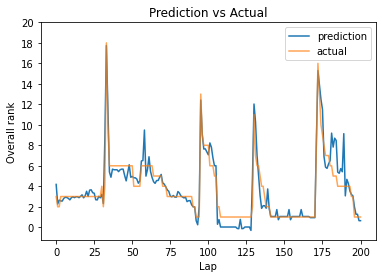

In [72]:
plt.plot(yhat)
plt.plot(val, alpha=0.7)
plt.legend(['prediction', 'actual'])
plt.title("Prediction vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(0, 22, 2)))
#plt.yticks(list(range(max(0,int(min(y_train_12))-2), int(max(y_train_12))+3, 2)))